In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

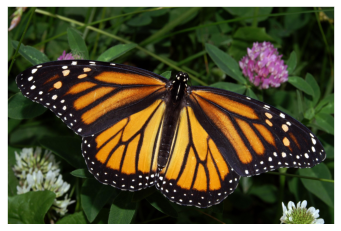

In [3]:
image = cv2.imread('monarch.jpg')

image_copy = np.copy(image)

image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

plt.xticks([])
plt.yticks([])

plt.show()

In [4]:
pixel_vals = image_copy.reshape((-1,3))

pixel_vals = np.float32(pixel_vals)

In [5]:
k = 2
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
retval, labels, centers = cv2.kmeans(pixel_vals,k,None,criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

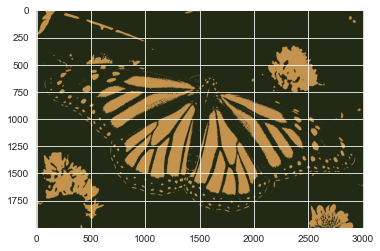

In [8]:
centers = np.uint8(centers)

segmented_data = centers[labels.flatten()]

segmented_image = segmented_data.reshape((image_copy.shape))
labels_reshape = labels.reshape(image_copy.shape[0], image_copy.shape[1])

plt.imshow(segmented_image)

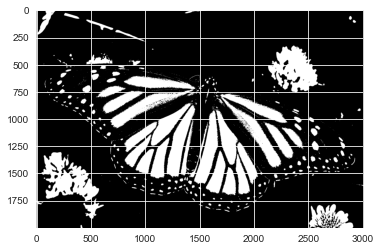

In [14]:
plt.imshow(labels_reshape == 1,cmap='gray')

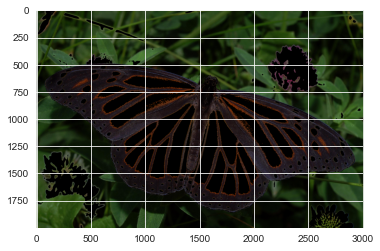

In [16]:
masked_image = np.copy(image_copy)

masked_image[labels_reshape == 1] = [0,0,0]

plt.imshow(masked_image)